Introduction: Introduce the project, and your approach, talk about the process of how you came up with the metric and some alternatives you may have explored.

The Metric: Describe your metric, and what features are you measuring. What datasets are you using?

The Best Neighborhood: Apply the metric from the previous section to determine the best neighborhood in Pittsburgh. Beyond just executing code, provide a narrative about why you think this is the best neighborhood. Incorporate a data visualization, perhaps to rank all of the neighborhoods or show a neighborhood’s best-ness over time. The key is to make a data driven argument.

Conclusion: Reflect on how the data-driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.


# Introduction
>Our project was to combine together multiple datasets to find what we considered to be the "best" neighborhood in Pittsburgh. We first had to think of what being the "best" neighborhood mean't to us. We settled on the idea of the best neighborhood being the neighborhood where it would be the best to speed. John was quick to find a few datasets that would be related to traffic and road statistics and we ended up using almost all of our original datasets. We didn't explore any alternatives as we knew this idea would be good and easily supportable with our acquired datasets.

# Number of Crosswalks


# Number of Speed Bumps

Provided by the City of Pittsburgh's Department of Mobility & Infrastructure, the data reports on the location, type, and amount of speedbumps in any given neighborhood in Pittsburgh. I sorted through each speed bump, finding where in the city it was. Ultimately, Squirrel Hill South and Carrick had significatn numbers of speedbumps, while every other neighborhood was more or less unnaffected.

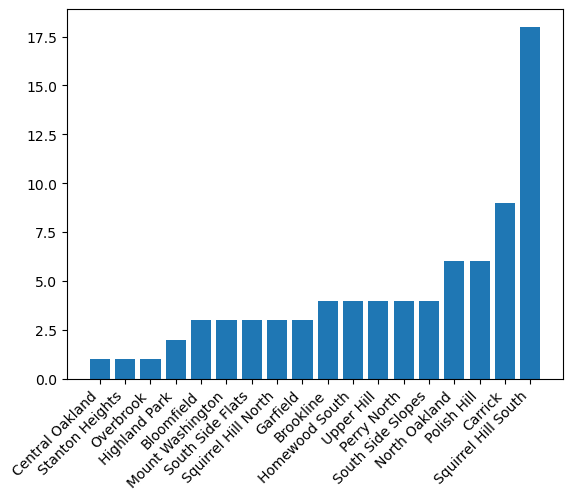

In [2]:
# load pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load data
data = pd.read_csv('speed_bumps.csv', index_col="_id")

# creates an empty dictionary to store neighborhoods and how many speed bumps
neighborhoodBumps = {}

# loops through each bump in dataset
for index, row in data.iterrows():
    #gets neighborhood bump is in
    neighborhood = row['neighborhood']

    #tries to increment number of bumps in neighborhood, if neighborhood does not yet exist it will create it in dictionary
    try:
        neighborhoodBumps[neighborhood] += 1

    except:
        neighborhoodBumps[neighborhood] = 1

#sort dictionary by num of bumps
d = dict(sorted(neighborhoodBumps.items(), key=lambda item: item[1]))

#displays data
plt.bar(range(len(d)), list(d.values()), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.xticks(rotation=45, ha='right')

plt.show()



# Number of Traffic Signs

# Speed and Quantity of Cars

This traffic count data is provided by the City of Pittsburgh's Department of Mobility & Infrastructure (DOMI). Counters were deployed as part of traffic studies, including intersection studies, and studies covering where or whether to install speed humps. The data is only available for the most recent count at each location.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

TCT = pd.read_csv('Datasets/Car_Count.csv') # TCT : Traffic Count Table
to_keep = ["average_daily_car_traffic", "speed_limit", "max_speed", "median_speed", "percent_over_limit", "neighborhood"]

filtered = TCT.filter(to_keep) # Keeps only wanted columns
filtered = filtered.dropna(subset=["average_daily_car_traffic", "speed_limit", "max_speed", "percent_over_limit"]) # Removes all data where the average daily car traffic is NaN
filtered = filtered.sort_values(by=["neighborhood", "percent_over_limit"])

group_by_percent_over_mean = filtered.groupby("neighborhood")["percent_over_limit"].mean().reset_index()
filtered["max_minus_limit"] = filtered["max_speed"] - filtered["speed_limit"]
group_by_max_minus_limit = filtered.groupby("neighborhood")["max_minus_limit"].mean().reset_index()

sorted_pom = group_by_percent_over_mean.sort_values(by="percent_over_limit")
sorted_mml = group_by_max_minus_limit.sort_values(by="max_minus_limit")

merged = sorted_pom.merge(sorted_mml, on="neighborhood")
merged = merged.query("percent_over_limit >= 50 & max_minus_limit >=30")

merged_sort_mml = merged.sort_values(by="max_minus_limit")

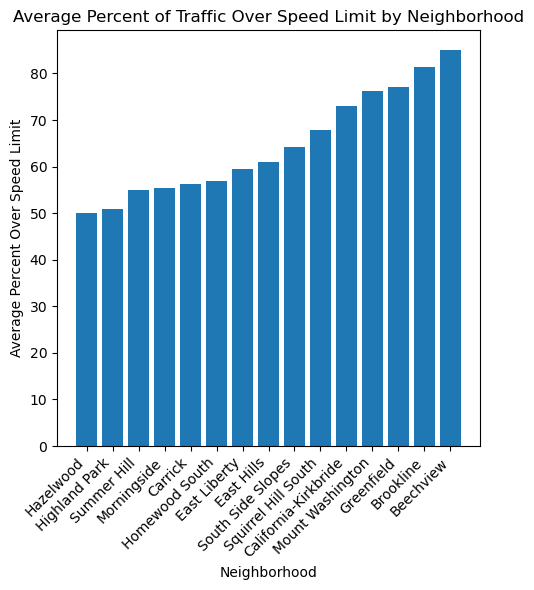

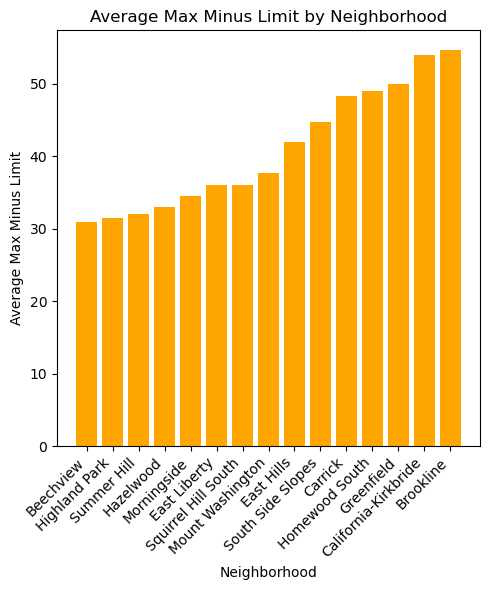

In [3]:
plt.figure(figsize=(5, 6))
plt.bar(merged['neighborhood'], merged['percent_over_limit'])
plt.xlabel('Neighborhood')
plt.ylabel('Average Percent Over Speed Limit')
plt.title('Average Percent of Traffic Over Speed Limit by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

plt.figure(figsize=(5, 6))
plt.bar(merged_sort_mml['neighborhood'], merged_sort_mml['max_minus_limit'], color='orange')
plt.xlabel('Neighborhood')
plt.ylabel('Average Max Minus Limit')
plt.title('Average Max Minus Limit by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

# The Best Neighborhood
Brookline.

# Conclusion
